<a href="https://colab.research.google.com/github/NikitaTsekh/Computer_Vision/blob/main/Roboflow_model_download_with_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Jul 20 09:24:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install -q roboflow
!!pip install -q ultralytics
!pip install -q supervision==0.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 383.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
from google.colab import drive
import os
from IPython.display import display, Image
from supervision.video.dataclasses import VideoInfo
from roboflow import Roboflow
from tqdm.notebook import tqdm
from supervision.video.source import get_video_frames_generator
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.draw.color import ColorPalette
from supervision.video.sink import VideoSink

In [ ]:

HOME = os.getcwd()
print(HOME)
drive.mount('/content/drive/')

/content
Mounted at /content/drive/


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


rf = Roboflow(api_key="ielTRZDEvInSk2LVmKz1")
project = rf.workspace("nikita-hhukk").project("massage-ball")
dataset = project.version(3).download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.138, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Massage-ball-3 in yolov8:: 100%|██████████| 396/396 [00:00<00:00, 5066.76it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 377MB/s]
Ultralytics YOLOv8.0.138 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Massage-ball-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=t

In [ ]:
from IPython import display
display.clear_output()

/content


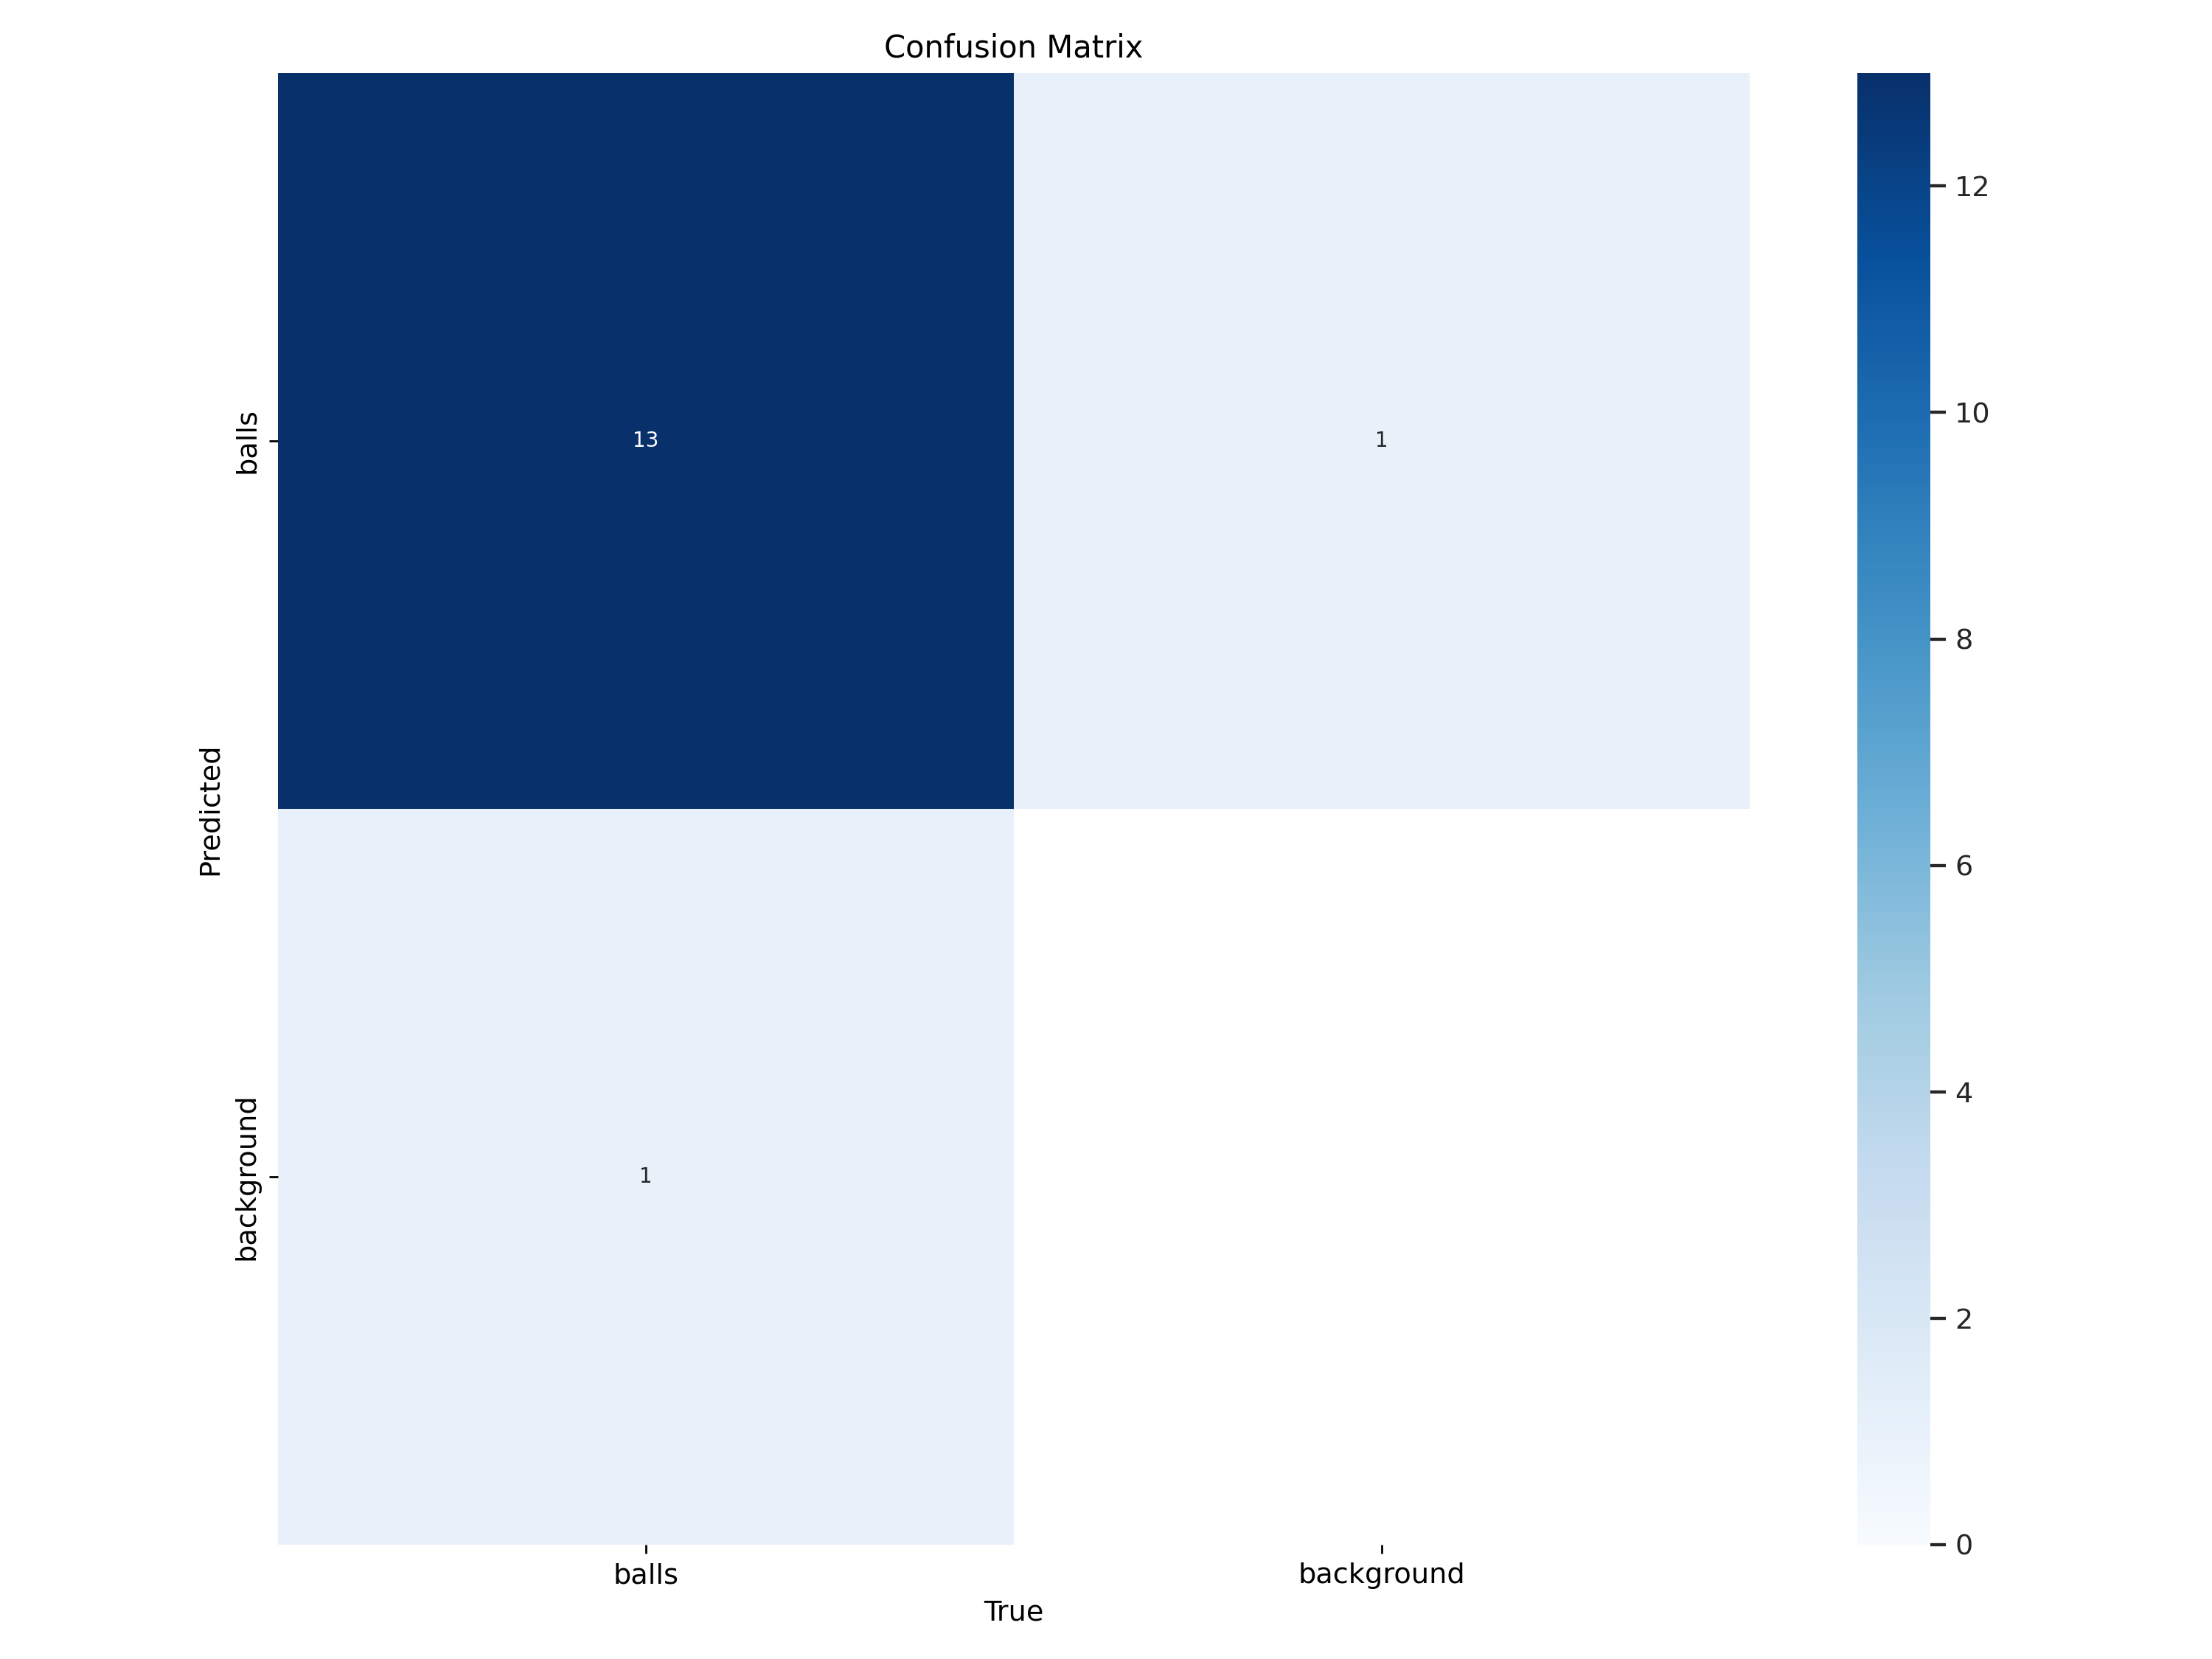

In [ ]:
%cd {HOME}
display.Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.138 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/datasets/Massage-ball-3/valid/labels.cache... 16 images, 3 backgrounds, 0 corrupt: 100% 16/16 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.33it/s]
                   all         16         14      0.997      0.929      0.929      0.862
Speed: 0.3ms preprocess, 16.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.138 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/8 /content/datasets/Massage-ball-3/test/images/2023-07-12-14-45-01_JPG.rf.fe026d6ba0fdd1ddc0e327bda3d08883.jpg: 800x800 1 balls, 24.6ms
image 2/8 /content/datasets/Massage-ball-3/test/images/2023-07-12-14-45-15_JPG.rf.65d441f4402955741e8d88004026d164.jpg: 800x800 1 balls, 24.6ms
image 3/8 /content/datasets/Massage-ball-3/test/images/2023-07-12-14-46-41_JPG.rf.88f41cf456a542da6a114ef23fbd0baf.jpg: 800x800 1 balls, 24.6ms
image 4/8 /content/datasets/Massage-ball-3/test/images/2023-07-12-14-48-02_JPG.rf.8c80a96e93b32461b54772a95205caae.jpg: 800x800 1 balls, 24.6ms
image 5/8 /content/datasets/Massage-ball-3/test/images/2023-07-12-14-48-10_JPG.rf.26c470f31f559c9a86c90d6a5c97d66a.jpg: 800x800 2 ballss, 24.6ms
image 6/8 /content/datasets/Massage-ball-3/test/images/2023-07-12-16-04-35_JPG.rf.4fc8bff57bf65d7c024366ce0c8ab0e8

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 380, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 106, in __init__
    self._load(model, task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 155, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 622, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 561, in torch_safe_load
    return torch.load(file, map_location='cpu'), file  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 791, in load
    with _open_file_like(f, 'rb')

In [ ]:
%cd {HOME}
model_path = os.path.join('runs/detect/train/weights/best.pt')

model = YOLO(model_path)


/content


In [ ]:
!ls

datasets  drive  runs  sample_data  yolov8n.pt	yolov8s.pt


/content


image 1/1 /content/drive/MyDrive/BALL_PREDICT.JPG: 320x320 1 balls, 8.2ms
Speed: 1.4ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 320)
Results saved to runs/detect/predict2


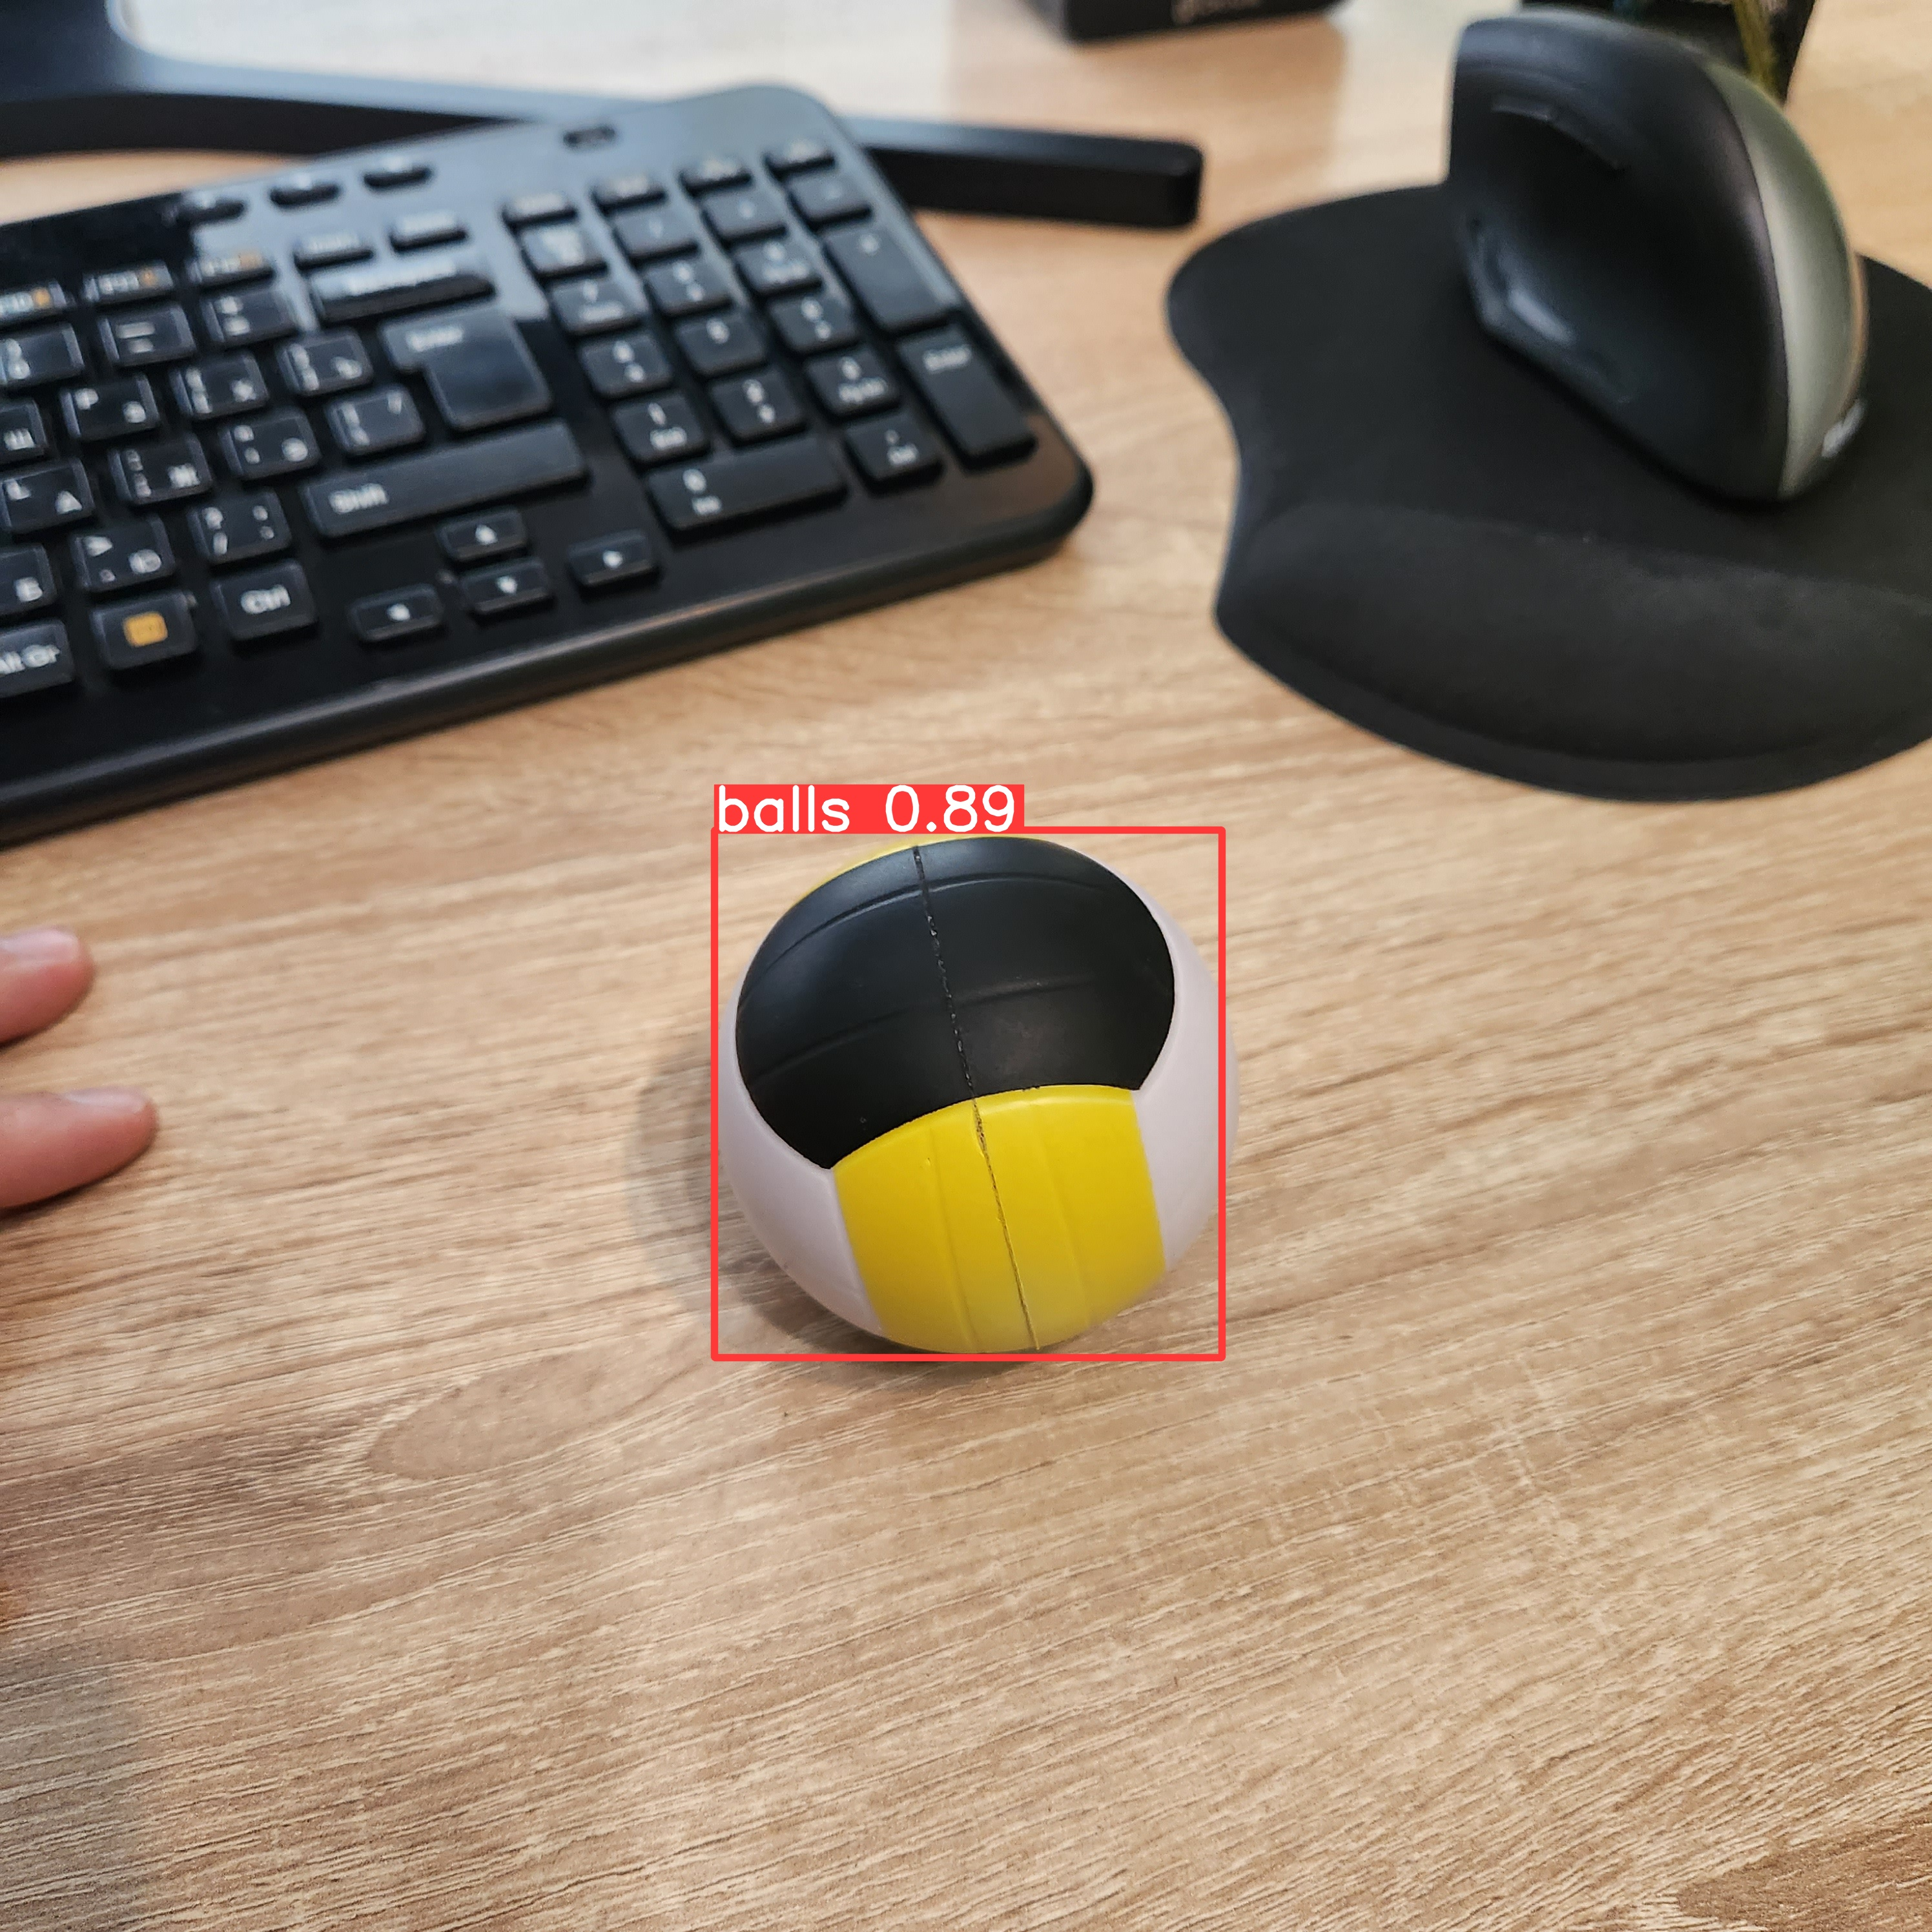

In [ ]:
%cd {HOME}
source_path='drive/MyDrive/BALL_PREDICT.JPG'
prediction = model.predict(source_path,save=True, imgsz=320, conf=0.5)  # you would need to replace this with actual model prediction function

Image(filename='runs/detect/predict2/BALL_PREDICT.JPG')

In [ ]:
# model.export(format='pytorch')

Model Video Inference

In [31]:
%cd {HOME}
SOURCE_VIDEO_PATH = f"{HOME}/drive/MyDrive/Ball_inference.MP4"
VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
TARGET_VIDEO_PATH = f"{HOME}/drive/MyDrive/Ball_inference_result.mp4"

/content


In [49]:
CLASS_NAMES_DICT = model.model.names
CLASS_NAMES_DICT

{0: 'balls'}

In [59]:
%cd {HOME}
# # Load the YOLOv8 model
# model = YOLO('yolov8n.pt')

# Open the video file
# generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
box_annotator = BoxAnnotator(color=ColorPalette.from_hex(['#008080']), thickness=4, text_thickness=4, text_scale=2)


with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    # loop over video frames
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame,conf=0.5)
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )
        # filtering out detections with unwanted classes


        # format custom labels
        labels = [
            f"#{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]

        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)

        sink.write_frame(frame)

/content


  0%|          | 0/226 [00:00<?, ?it/s]


0: 800x480 (no detections), 15.5ms
Speed: 3.8ms preprocess, 15.5ms inference, 0.9ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 (no detections), 15.5ms
Speed: 4.3ms preprocess, 15.5ms inference, 0.8ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 (no detections), 15.5ms
Speed: 4.1ms preprocess, 15.5ms inference, 0.8ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 (no detections), 15.4ms
Speed: 3.7ms preprocess, 15.4ms inference, 0.8ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 (no detections), 15.5ms
Speed: 4.6ms preprocess, 15.5ms inference, 0.8ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 1 balls, 15.5ms
Speed: 3.9ms preprocess, 15.5ms inference, 1.4ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 1 balls, 15.5ms
Speed: 4.4ms preprocess, 15.5ms inference, 1.4ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 1 balls, 15.4ms
Speed: 3.4ms preprocess, 15.4ms inference, 1.6ms postproc

https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb#scrollTo=3C3EO_2zNChu


https://www.youtube.com/watch?v=wuZtUMEiKWY&t=861s